In [1]:
#Build the Image classification model by dividing the model into following 4 stages:
#1.Loading and preprocessing the image data
#2.Defining the model's architecture
#3.Training the model
#4.Estimating the model's performance

In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
# Loading and preprocessing the image data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [6]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

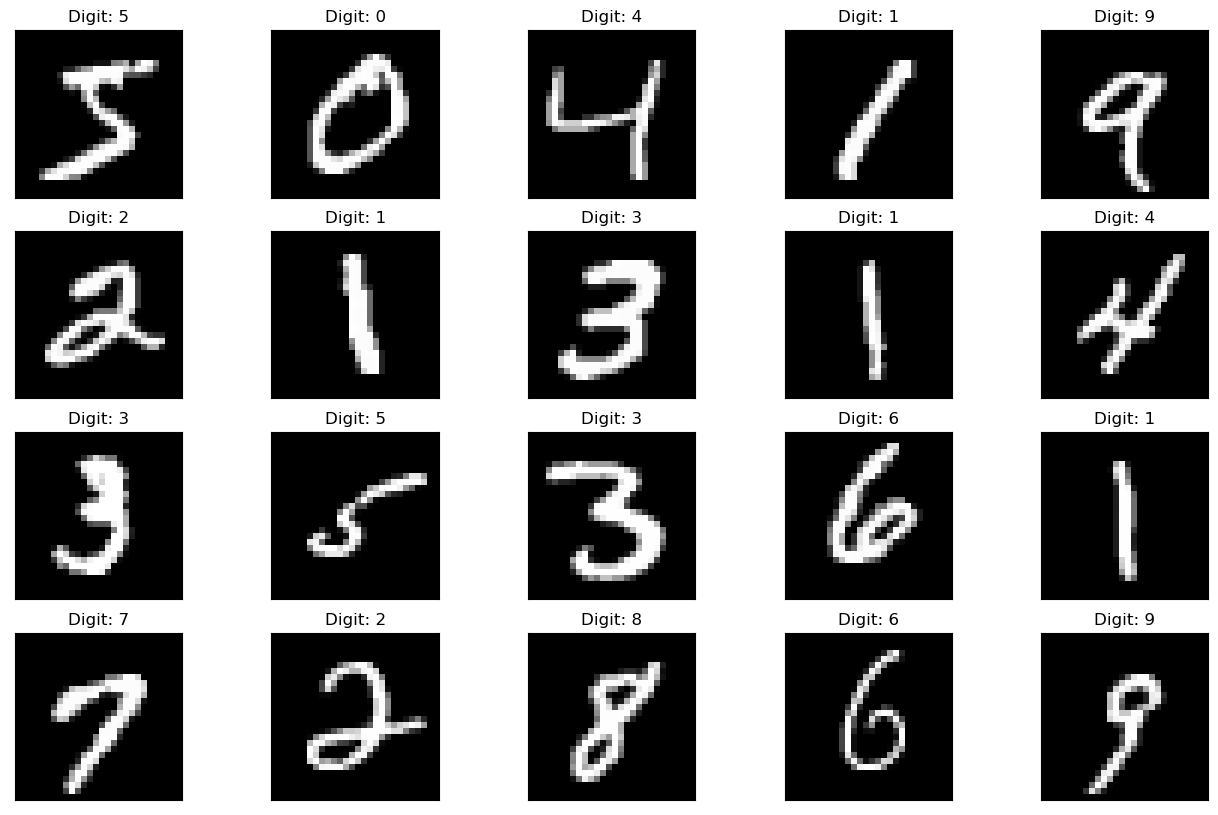

In [7]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [8]:
X_tarin = X_train.reshape((X_train.shape+ (1,)))
X_test = X_test.reshape((X_test.shape+(1,)))

In [9]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
# Defining the model's architecture

model = Sequential([
    Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(10,activation="softmax")
])

In [11]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [13]:
#Training and testing the model
Model_log=model.fit(X_train, y_train, epochs=10, batch_size=15,verbose=1,validation_data=0);

Epoch 1/10
4000/4000 [==============================] - 28s 7ms/step - loss: 0.1627 - accuracy: 0.9502
Epoch 2/10
4000/4000 [==============================] - 26s 6ms/step - loss: 0.0505 - accuracy: 0.9845
Epoch 3/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.0324 - accuracy: 0.9900
Epoch 4/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 5/10
4000/4000 [==============================] - 27s 7ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 6/10
4000/4000 [==============================] - 26s 7ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 7/10
4000/4000 [==============================] - 26s 7ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 8/10
4000/4000 [==============================] - 27s 7ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 9/10
4000/4000 [==============================] - 27s 7ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 10/10
4000/4000 [==============================] - 32s 8ms/step - l

1/1 [==============================] - 0s 21ms/step


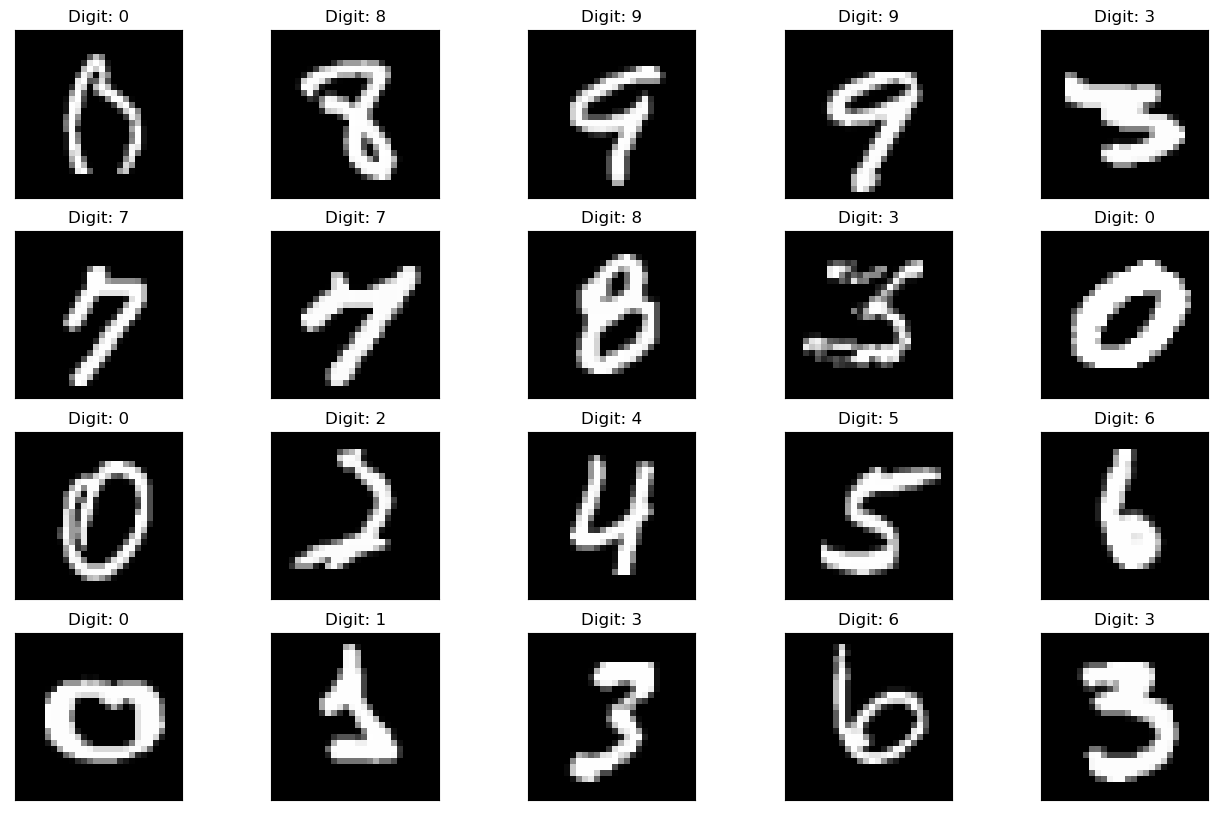

In [14]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [15]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 [==============================] - 1s 4ms/step


0.9891

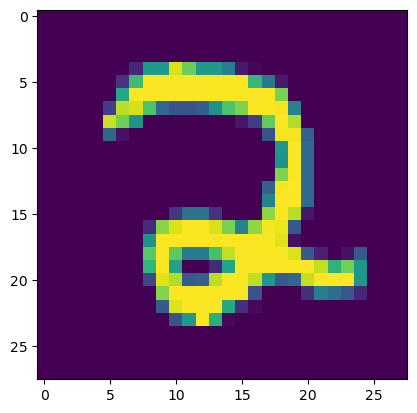

In [16]:
n = random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [17]:
predicted_value = model.predict(X_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is = 2


In [18]:
# Estimating the model's performance
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:' , score[0])
print('Testaccuracy:',score[1])

Test loss: 0.04404652863740921
Testaccuracy: 0.9890999794006348
